# This part requires detectron2 installation 

In [7]:
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [8]:
import matplotlib.pyplot as plt

In [9]:
import os.path
from pathlib import Path
import shutil

In [10]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

[01/30 20:03:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


Leave the following cell for running process on all images

In [25]:

# assign directory
# update paths accordingly

path = Path('../data/6_13')

# iterate over files in
# that directory
for file_ind, file in enumerate(os.listdir(path)):
    file_name = os.path.join(path,file)
    if os.path.isfile(file_name):
        #print(file_name)
        im = cv2.imread(file_name)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        
        outputs = predictor(im)
        
        
        
        mask= outputs['instances'].get('pred_masks')
        mask= mask.to('cpu')
        
        pclass= outputs['instances'].get('pred_classes')
        pclass=pclass.to('cpu').numpy()


        
        
        h,w,c = im.shape
        out = np.zeros((h,w,1),dtype='int64')

        for i, j in enumerate(mask):
            if pclass[i]==21:
                f = mask[i]
                f = np.expand_dims(f,axis=2)
                f = np.where(f==True, 1, 0)
                out += f
        trace = np.where(out!=0, im, 0)
        trace = cv2.cvtColor(trace, cv2.COLOR_RGB2BGR)
        
        
        #np_arr = mask.cpu().detach().numpy()
        #trace = np_arr.reshape(([np_arr.shape[1],np_arr.shape[2],-1]))
        #trace = np.where(trace==True, im, 0)
        #print(trace)
        
        new_folder = '../detectron2test'
        if not os.path.exists(new_folder):
            os.makedirs(new_folder)
        cv2.imwrite(new_folder+'/'+file,trace)
   

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/envs/spr/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/86/xfd2hb_n02s_vgsmx2bv46j00000gn/T/ipykernel_43820/963929056.py", line 15, in <module>
    outputs = predictor(im)
  File "/opt/anaconda3/envs/spr/lib/python3.10/site-packages/detectron2/engine/defaults.py", line 319, in __call__
    predictions = self.model([inputs])[0]
  File "/opt/anaconda3/envs/spr/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    it can be modified.
  File "/opt/anaconda3/envs/spr/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    strict (bool): whether to strictly enforce that the keys in
  File "/opt/anaconda3/envs/spr/lib/python3.10/site-packages/detectron2/modeling/meta_arch/rcnn.py", line 150, in forward
    return self.inference(batched_inputs)
  File "

Let's start by running process on a single image to begin

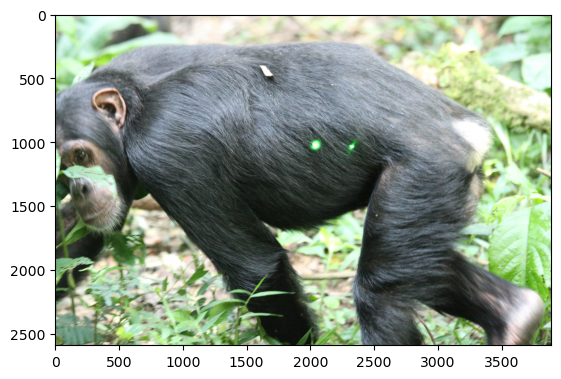

In [11]:
img = cv2.imread('../data/6_13/IMG_0335.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
outputs = predictor(img)

print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)             
# mask= outputs['instances'].get('pred_masks')
# mask= mask.to('cpu')

# pclass= outputs['instances'].get('pred_classes')
# pclass=pclass.to('cpu').numpy()




# h,w,c = img.shape
# out = np.zeros((h,w,1),dtype='int64')

# for i, j in enumerate(mask):
#     if pclass[i]==21:
#         f = mask[i]
#         f = np.expand_dims(f,axis=2)
#         f = np.where(f==True, 1, 0)
#         out += f
# trace = np.where(out!=0, img, 0)
# trace = cv2.cvtColor(trace, cv2.COLOR_RGB2BGR)

RuntimeError: Couldn't load custom C++ ops. This can happen if your PyTorch and torchvision versions are incompatible, or if you had errors while compiling torchvision from source. For further information on the compatible versions, check https://github.com/pytorch/vision#installation for the compatibility matrix. Please check your PyTorch version with torch.__version__ and your torchvision version with torchvision.__version__ and verify if they are compatible, and if not please reinstall torchvision so that it matches your PyTorch install.

In [ ]:
pic=cv2.imread(file_name)

In [ ]:

plt.imshow(trace)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import torch
import numpy as np
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F
import PIL
from PIL import Image
import cv2
from torchvision.utils import save_image
import os
import os.path
from pathlib import Path
import shutil, os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

# Start running from here: Provide, masked segmentation output as input image. This can be obtained either via detectron2 or SegmentAnthing (SAM).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
#from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F
import PIL
from PIL import Image
import cv2
from torchvision.utils import save_image
import os
import os.path
from pathlib import Path
import shutil, os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

In [ ]:
# import required module
import os
from skimage.feature import blob_log
# assign directory
path = Path('/home/obafemi/Downloads/mask_result_updated2.0') #the path to masked image folder (SAM or detectron2) update path accordingly
path2 = Path('/media/obafemi/New Volume/chimp/sample') #path to source image folder, update accordingly
# iterate over files in
# that directory
for file_ind, file in enumerate(os.listdir(path)):
    file_name = os.path.join(path,file)
    full_im = os.path.join(path2,file)
    #f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(file_name):
        img = cv2.imread(file_name)
        img2 = cv2.imread(full_im)   
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = cv2.resize(img,(2000,2000))
        hsv_frame = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert from BGR to HSV 

        low_green = np.array([55, 110, 110])  #low_green values for green mask
        high_green = np.array([65, 255, 255]) #high_green values for green mask
        green_mask = cv2.inRange(hsv_frame, low_green, high_green) #performs basic threshold
        green = cv2.bitwise_and(img, img, mask=green_mask)#performs bitwise and operation
        #plt.imshow(green)
        g = green[:,:,1] #extracts the green channel
       # green = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)
        #ret, thresh = cv2.threshold(g, 220,255,cv2.THRESH_BINARY)
        blur = cv2.GaussianBlur(g,(25,25),0) #adds blurring for smoothing
        ret3,thresh = cv2.threshold(blur,210,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #thresholding technique - pixel values <210 turn to 0, pixel values >210 turn to 255
        
        #ret, thresh = cv2.threshold(g, 250,255,cv2.THRESH_BINARY) testing a different thresholding technique
        #th3 = cv2.dilate(thresh,(5,5),iterations=35)
        
        
        thresh = cv2.dilate(thresh,(5,5),iterations=28) #adds dilation to enlarge dots a bit can be tuned with the arguments

        #thresh = cv2.dilate(thresh,(5,7),iterations=35)
       # plt.imshow(thresh, cmap='gray')
       # fig, ax = plt.subplots(1,2,figsize=(10,5))
        #ax[0].set_title('Binary Thresholding',fontsize=15)
        #ax[0].imshow(thresh,cmap='gray')



        blobs = blob_log(thresh, max_sigma=50, threshold=0.15) # blob detection
        count =0
        if blobs.size != 0:  #checks if a blob was found
           # ax[1].imshow(thresh, cmap='gray')
            for blob in blobs[:2,:]:
                y, x, area = blob
                if area>1:   #checks for area of blob
                   
                    count +=1

                    result1 = cv2.circle(img2, (int(x),int(y)),12,(0,0,255),-1) # draws circles on detected blob
                
                    new_folder = '/media/obafemi/New Volume/chimp/mask_detection_result4' #folder where you want resulting images stored, update accordinly
                    if not os.path.exists(new_folder):
                        os.makedirs(new_folder)
                
                    cv2.imwrite(new_folder+'/'+file,result1)
                   
            
